<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

In [29]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import zscore
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [30]:
df = pd.read_csv('House Prices.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">EDA</h1>

In [31]:
df.shape

(333, 15)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [33]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [34]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df = df.drop(columns='ID')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualization</h1>

Z-score how many standard deviations a data point is from the mean. Typically, data points with a Z-score greater than 3 or less than -3 are considered outliers.

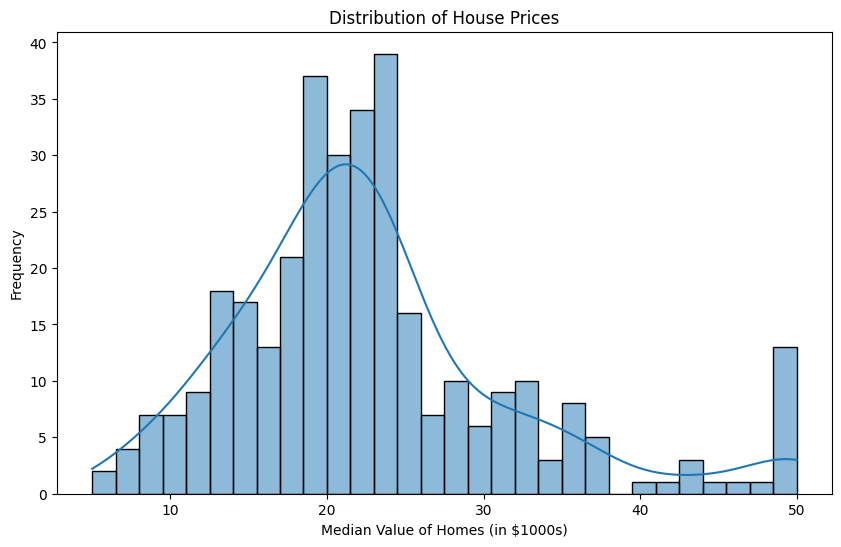

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Median Value of Homes (in $1000s)')
plt.ylabel('Frequency')
plt.show()

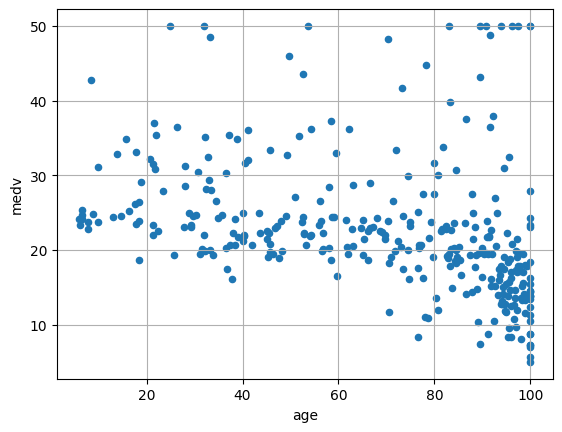

In [38]:
df.plot(kind="scatter", x="age", y="medv", grid=True)
plt.show()

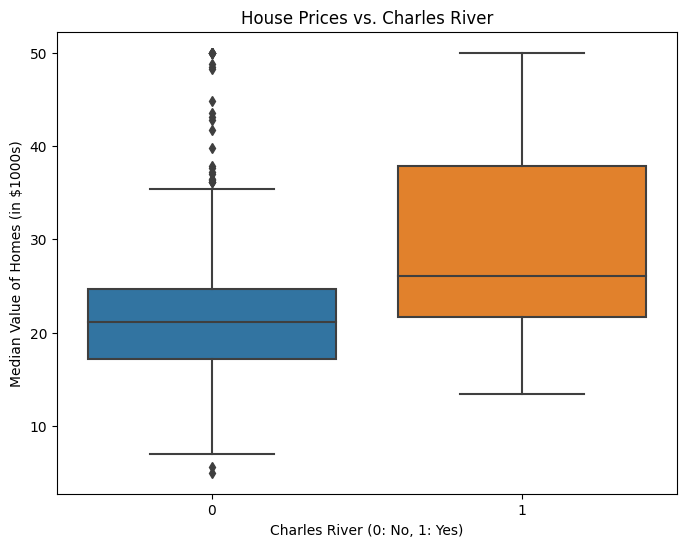

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=df)
plt.title('House Prices vs. Charles River')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()

<Axes: xlabel='medv', ylabel='Density'>

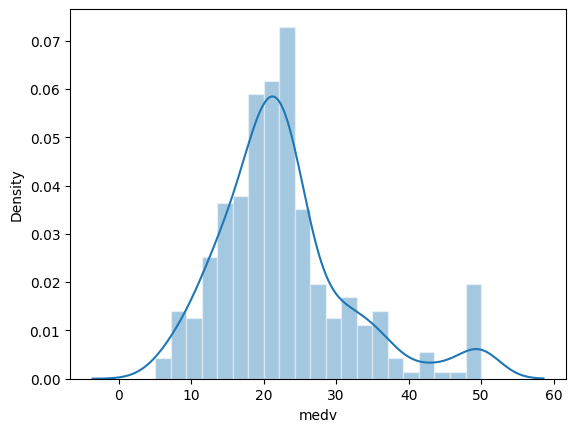

In [40]:
sns.histplot(df['medv'], kde=True, kde_kws=dict(cut=3),
             stat="density", alpha=.4, edgecolor=(1, 1, 1, .4))

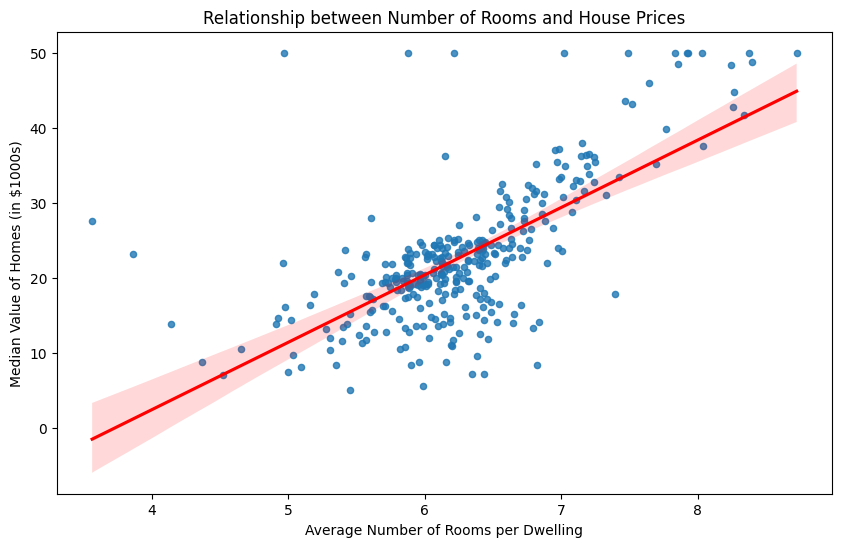

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rm', y='medv', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relationship between Number of Rooms and House Prices')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()

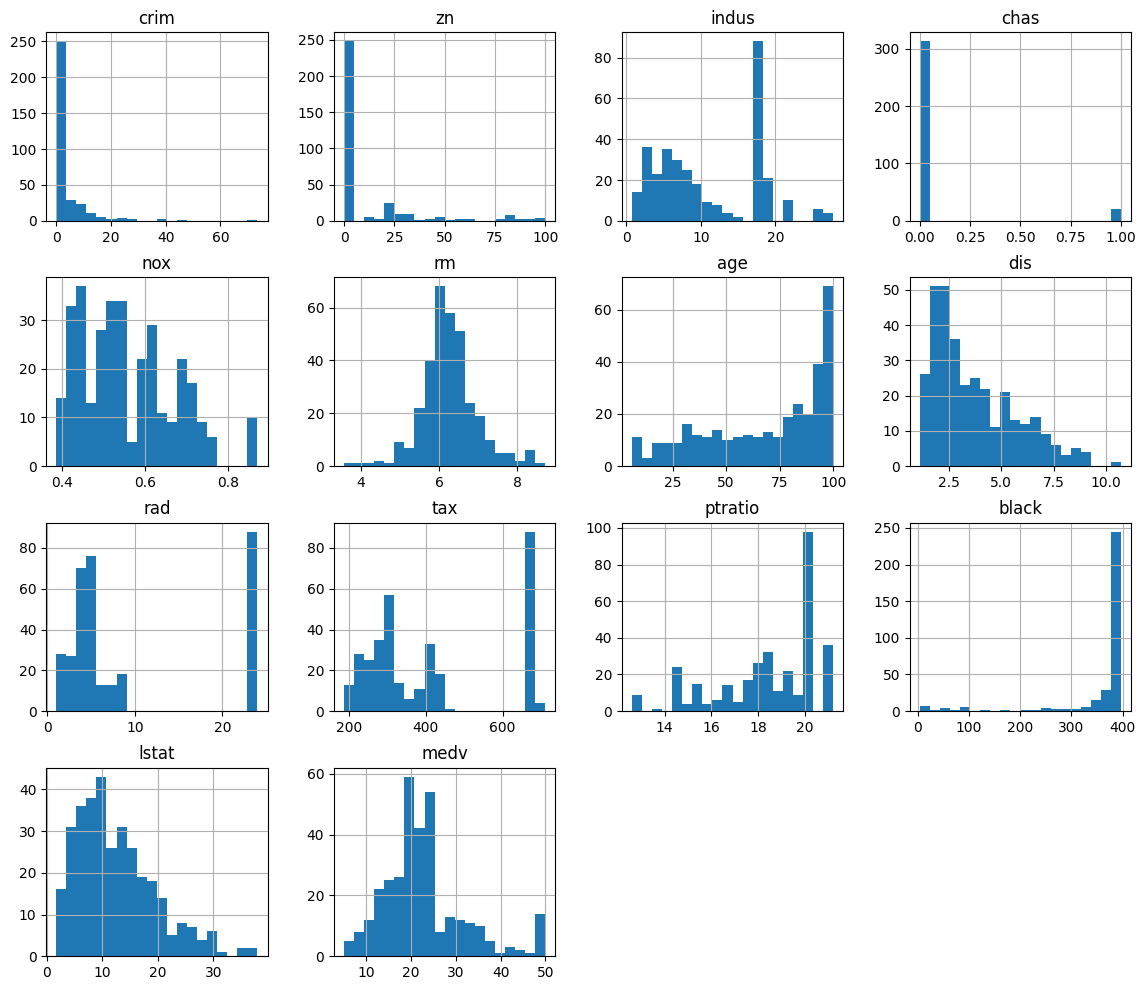

In [42]:
df.hist(figsize=(14, 12), bins=20)
plt.show()

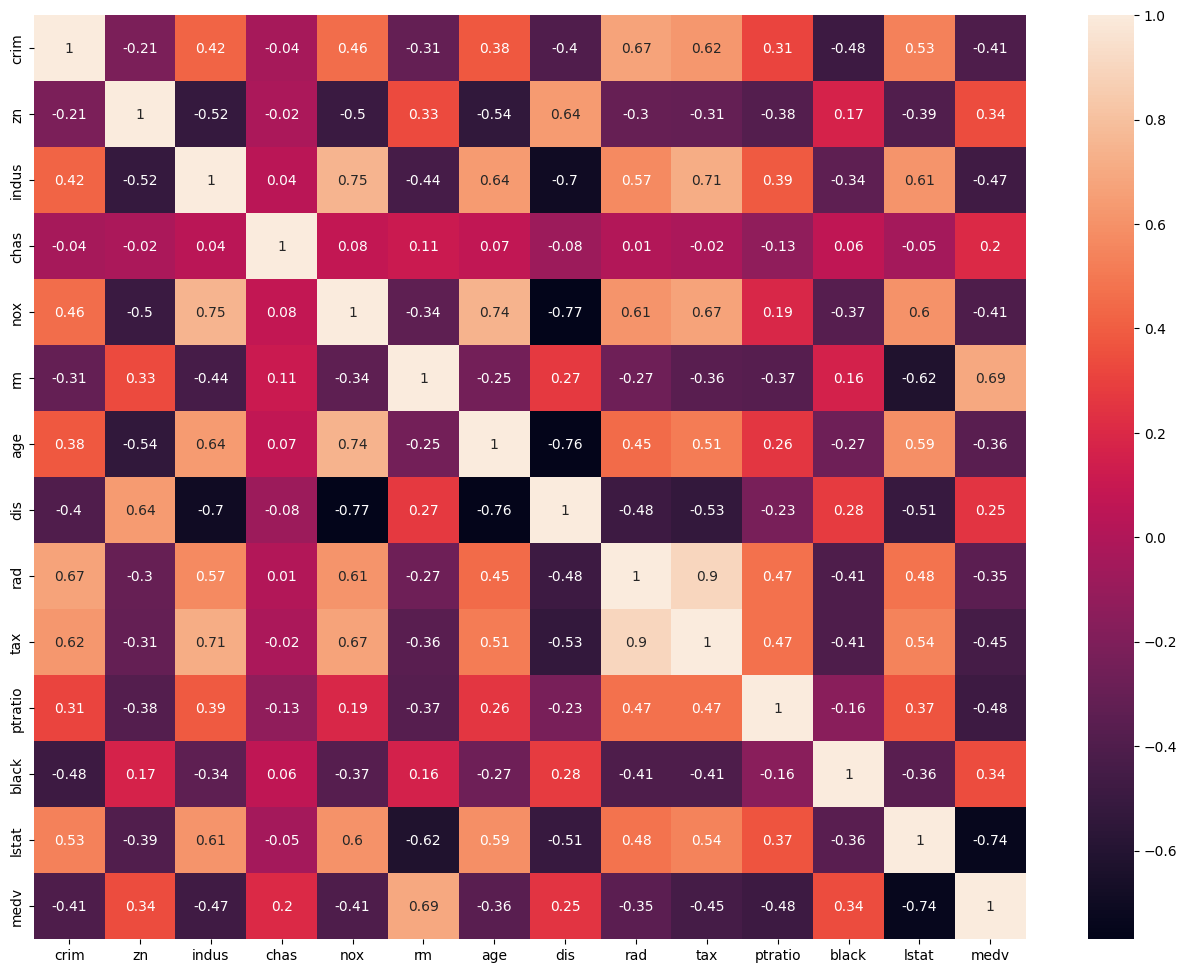

In [43]:
plt.subplots(figsize=(16, 12))
correlation = df.corr().round(2)
sns_plot = sns.heatmap(correlation, annot=True)

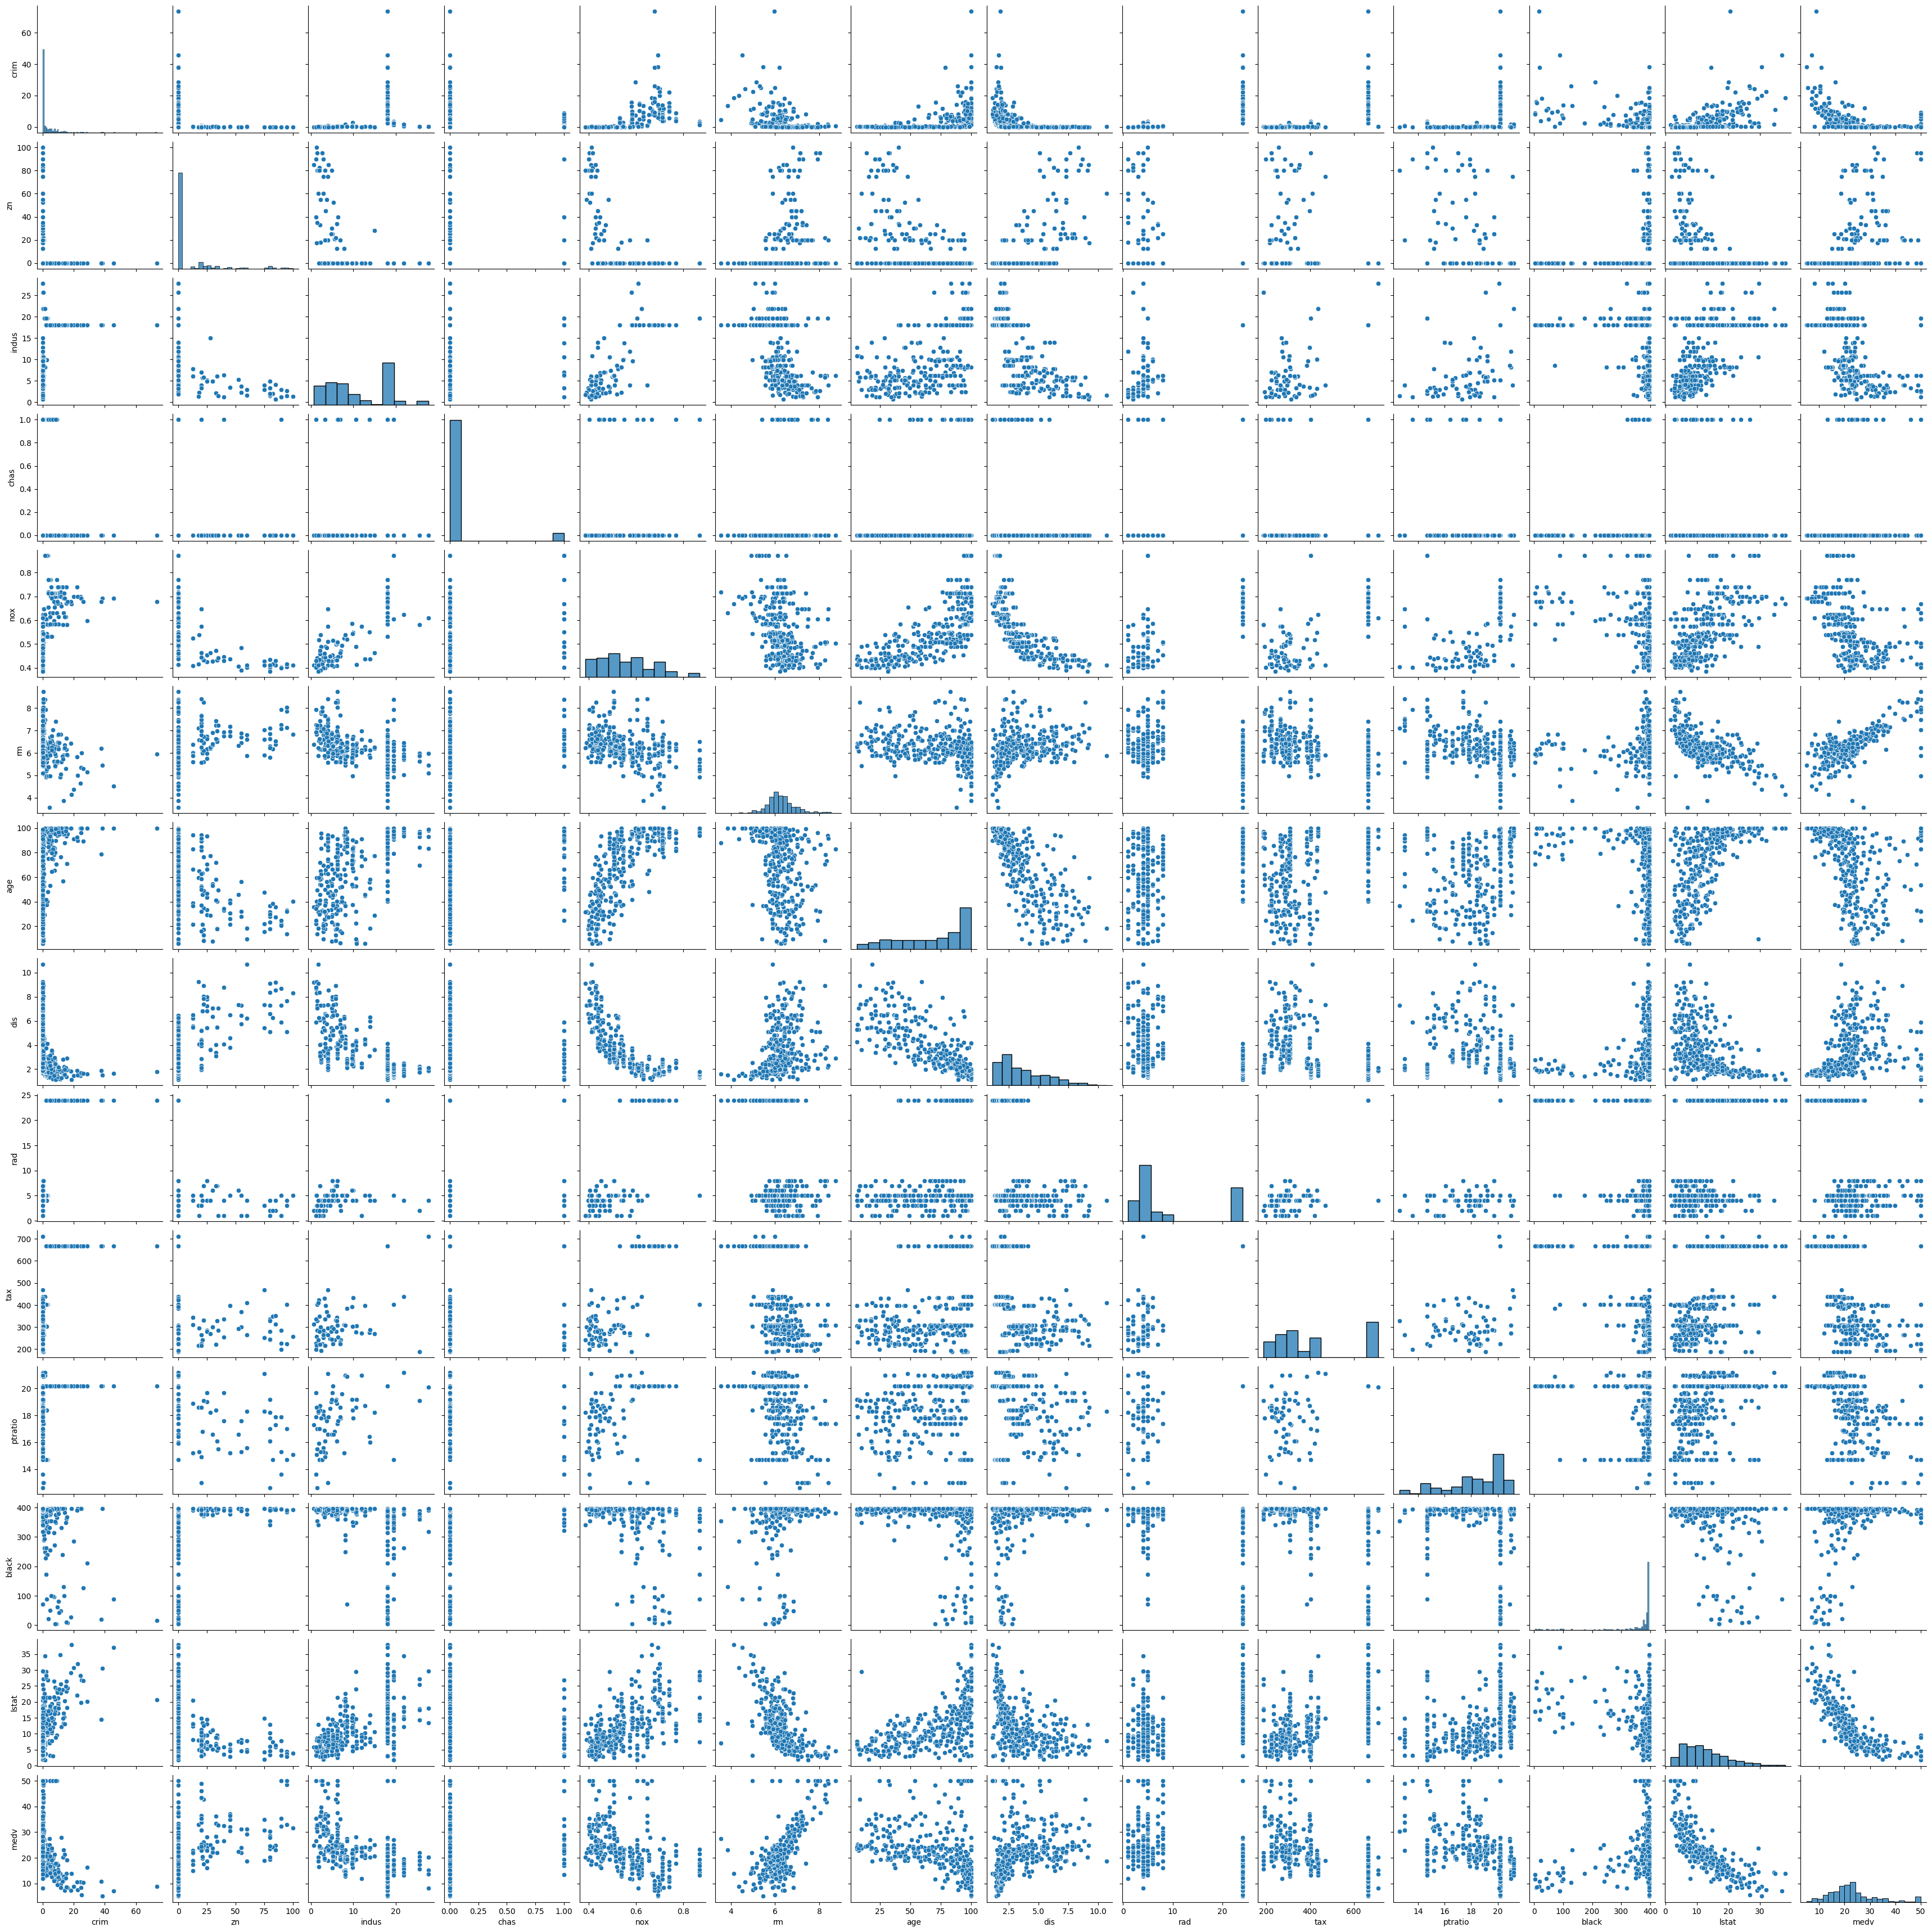

In [44]:
sns.pairplot(df)
plt.show()

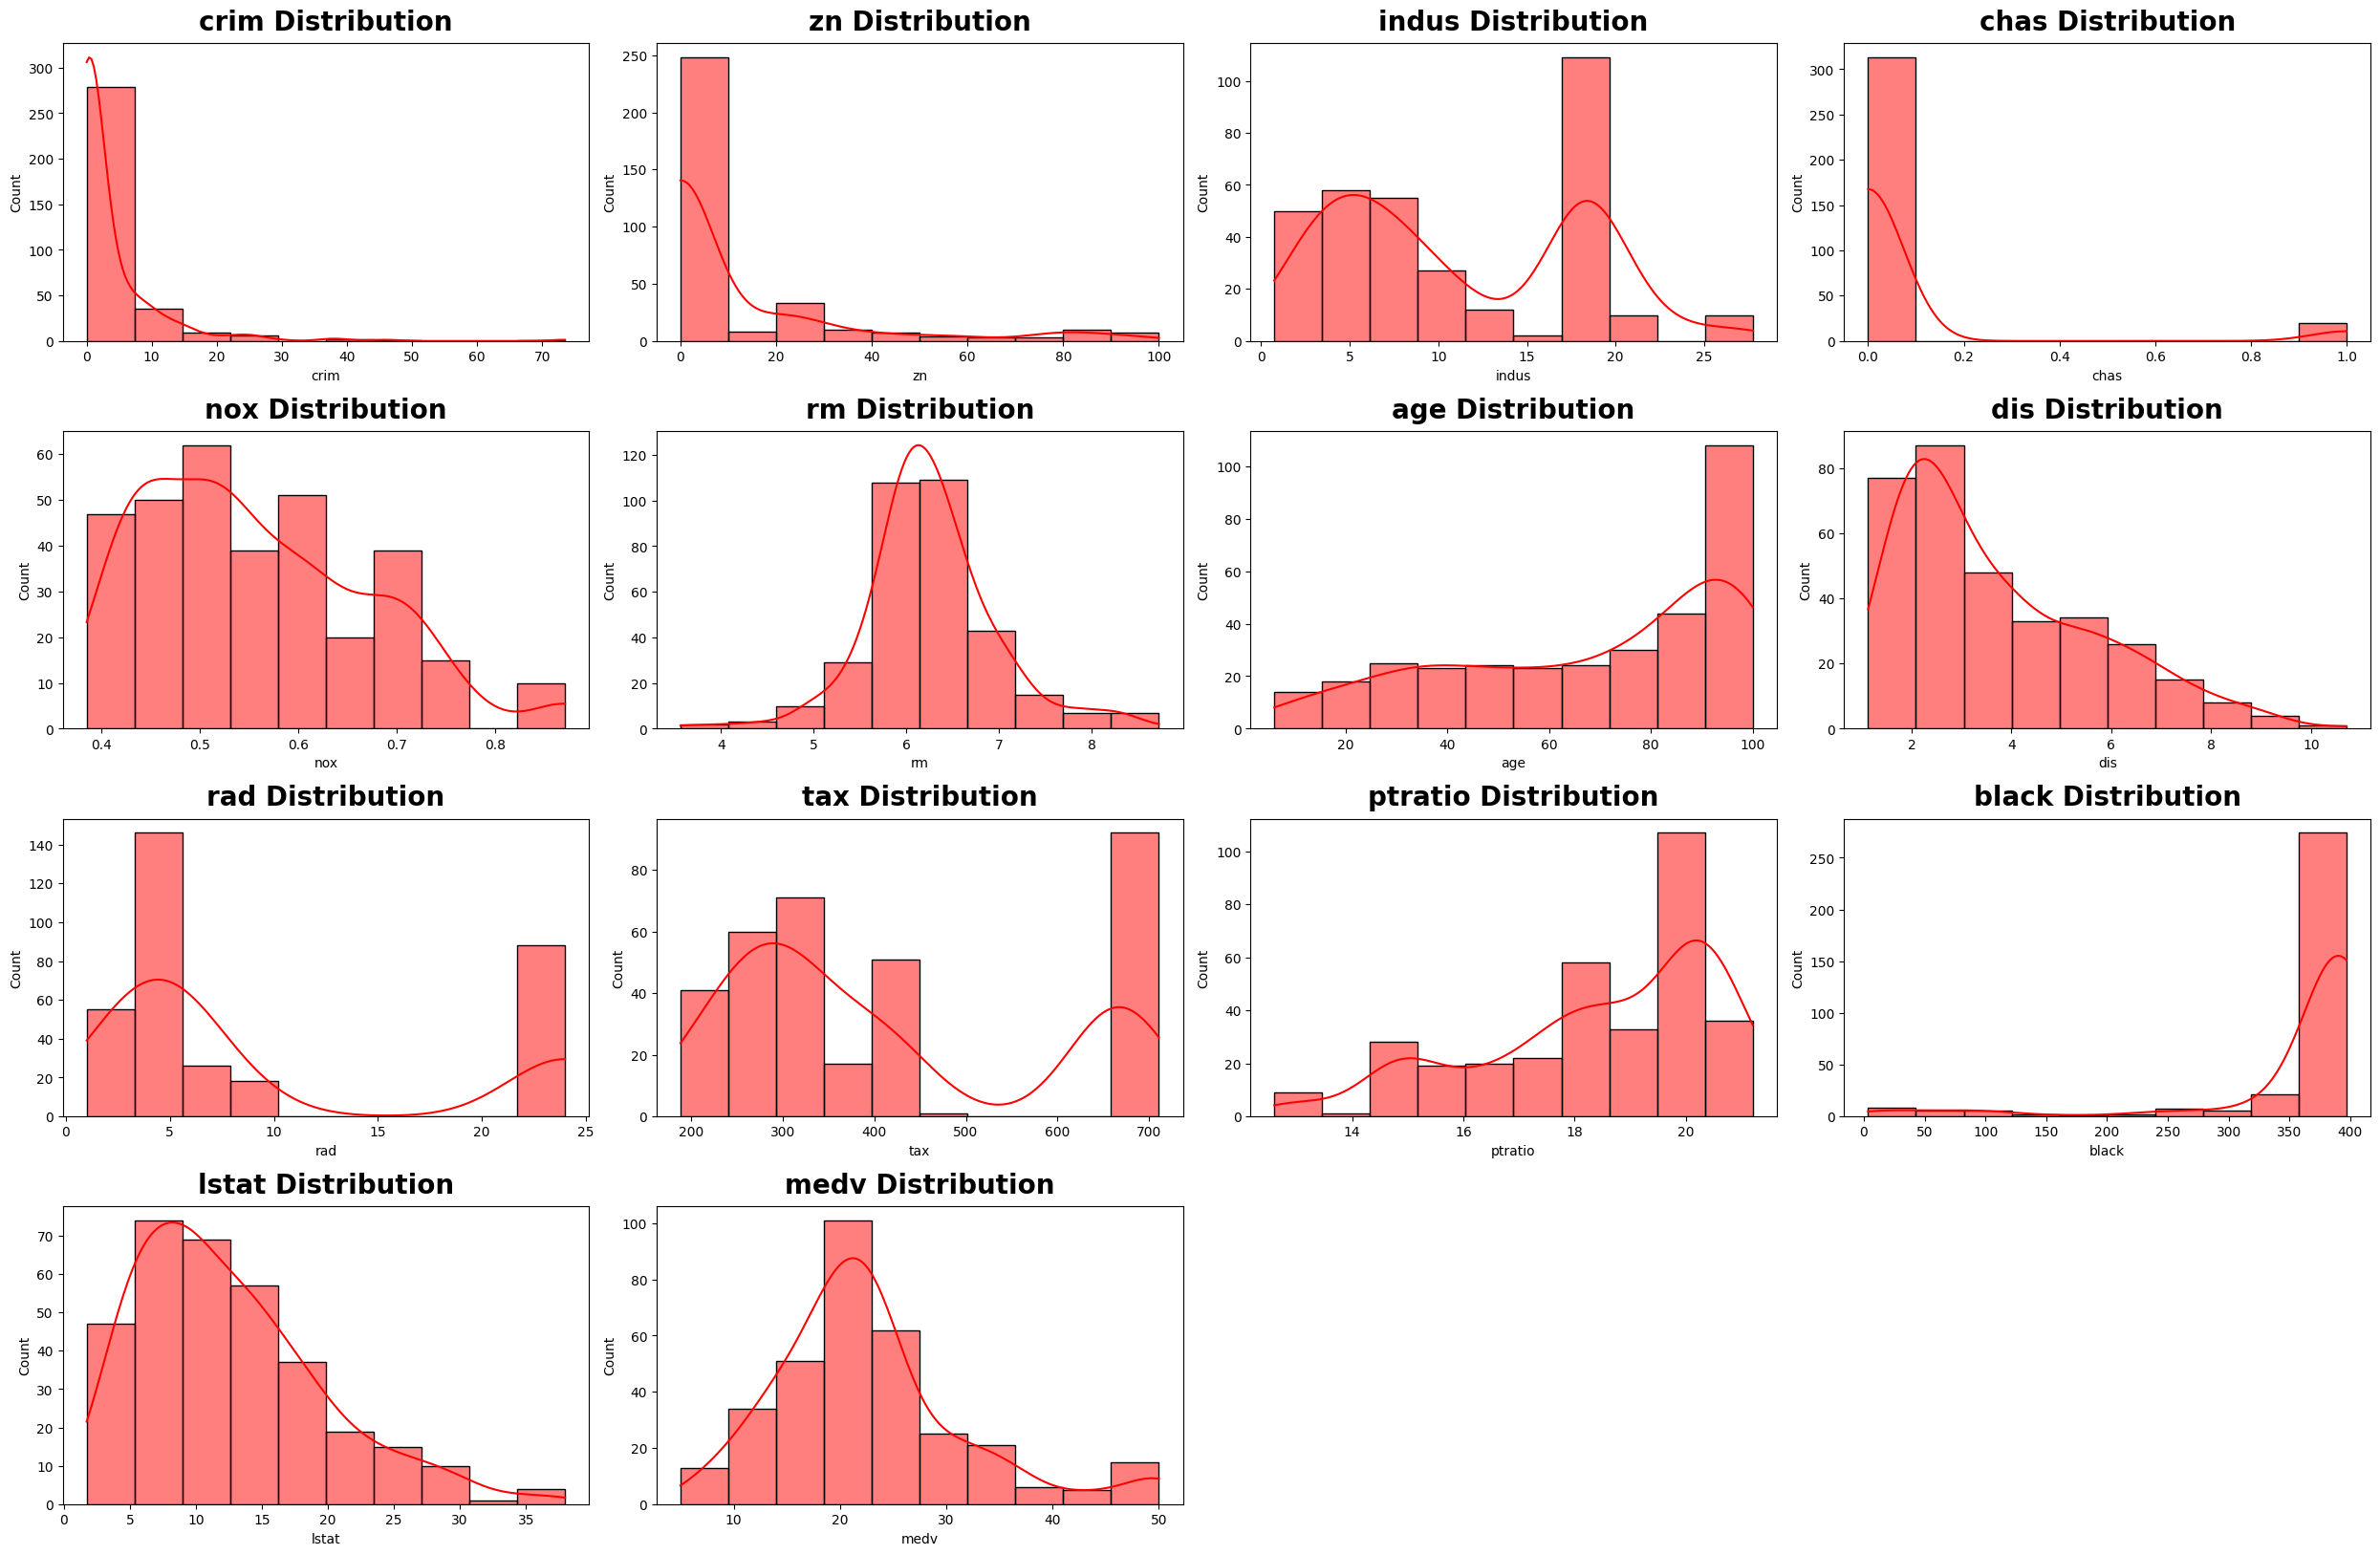

In [45]:
con_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'black', 'lstat', 'medv']

plt.figure(figsize=(25, 20))
for index, column in enumerate(con_cols):
    plt.subplot(5, 4, index+1)
    sns.histplot(df[column], bins=10, kde=True, color="red")
    plt.title(f"{column} Distribution", fontweight="black", size=20, pad=10)
    plt.tight_layout()

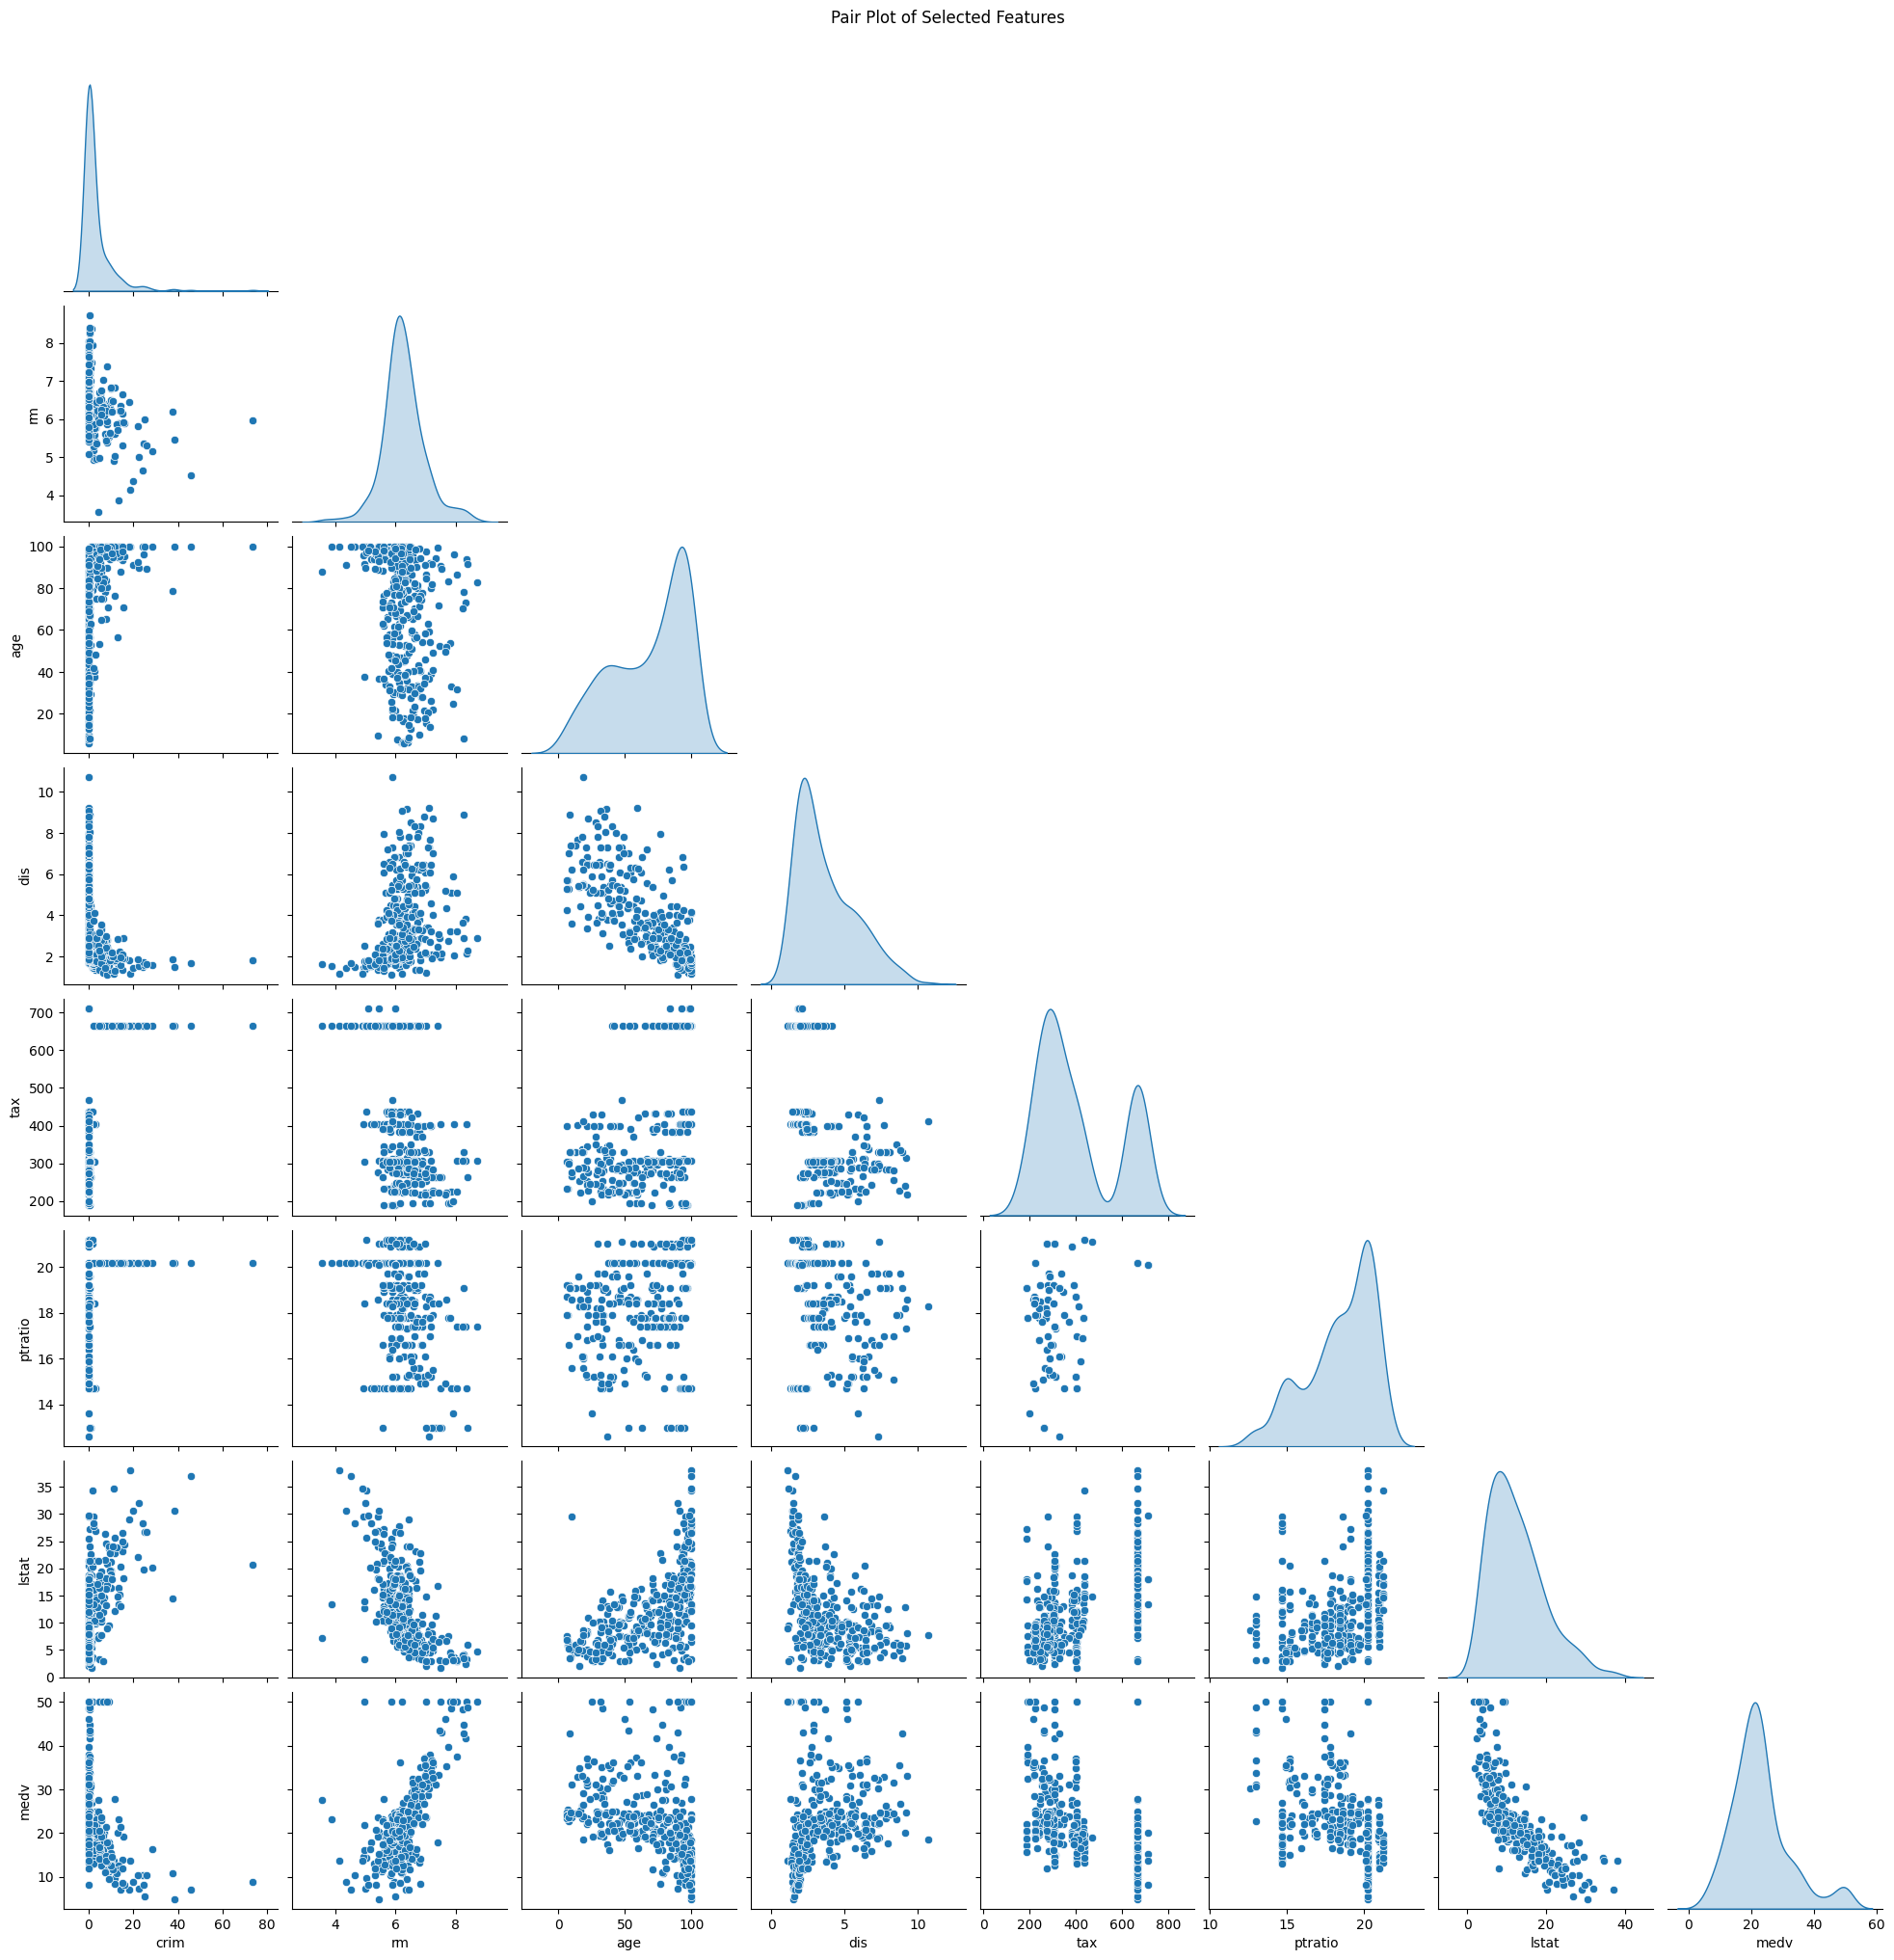

In [46]:
subset = ['crim', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat', 'medv']
sns.pairplot(df[subset], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Outlier Analysis</h1> 

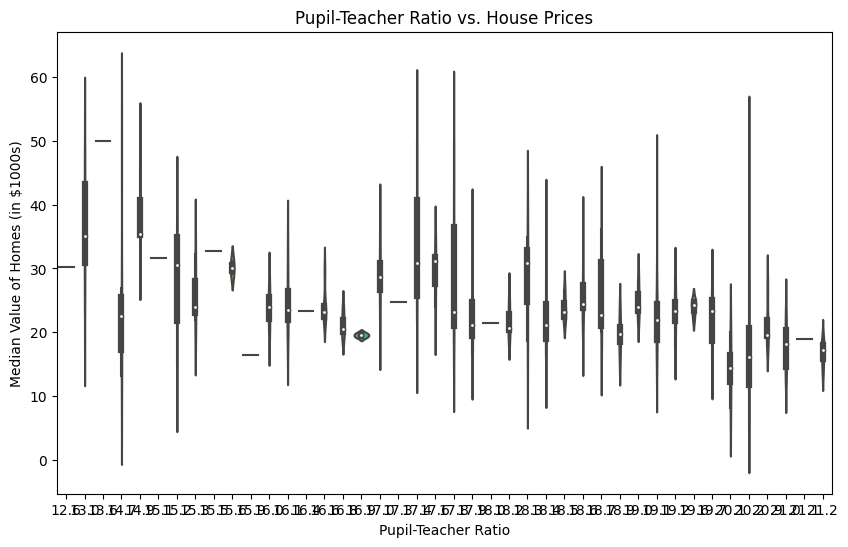

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ptratio', y='medv', data=df)
plt.title('Pupil-Teacher Ratio vs. House Prices')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()

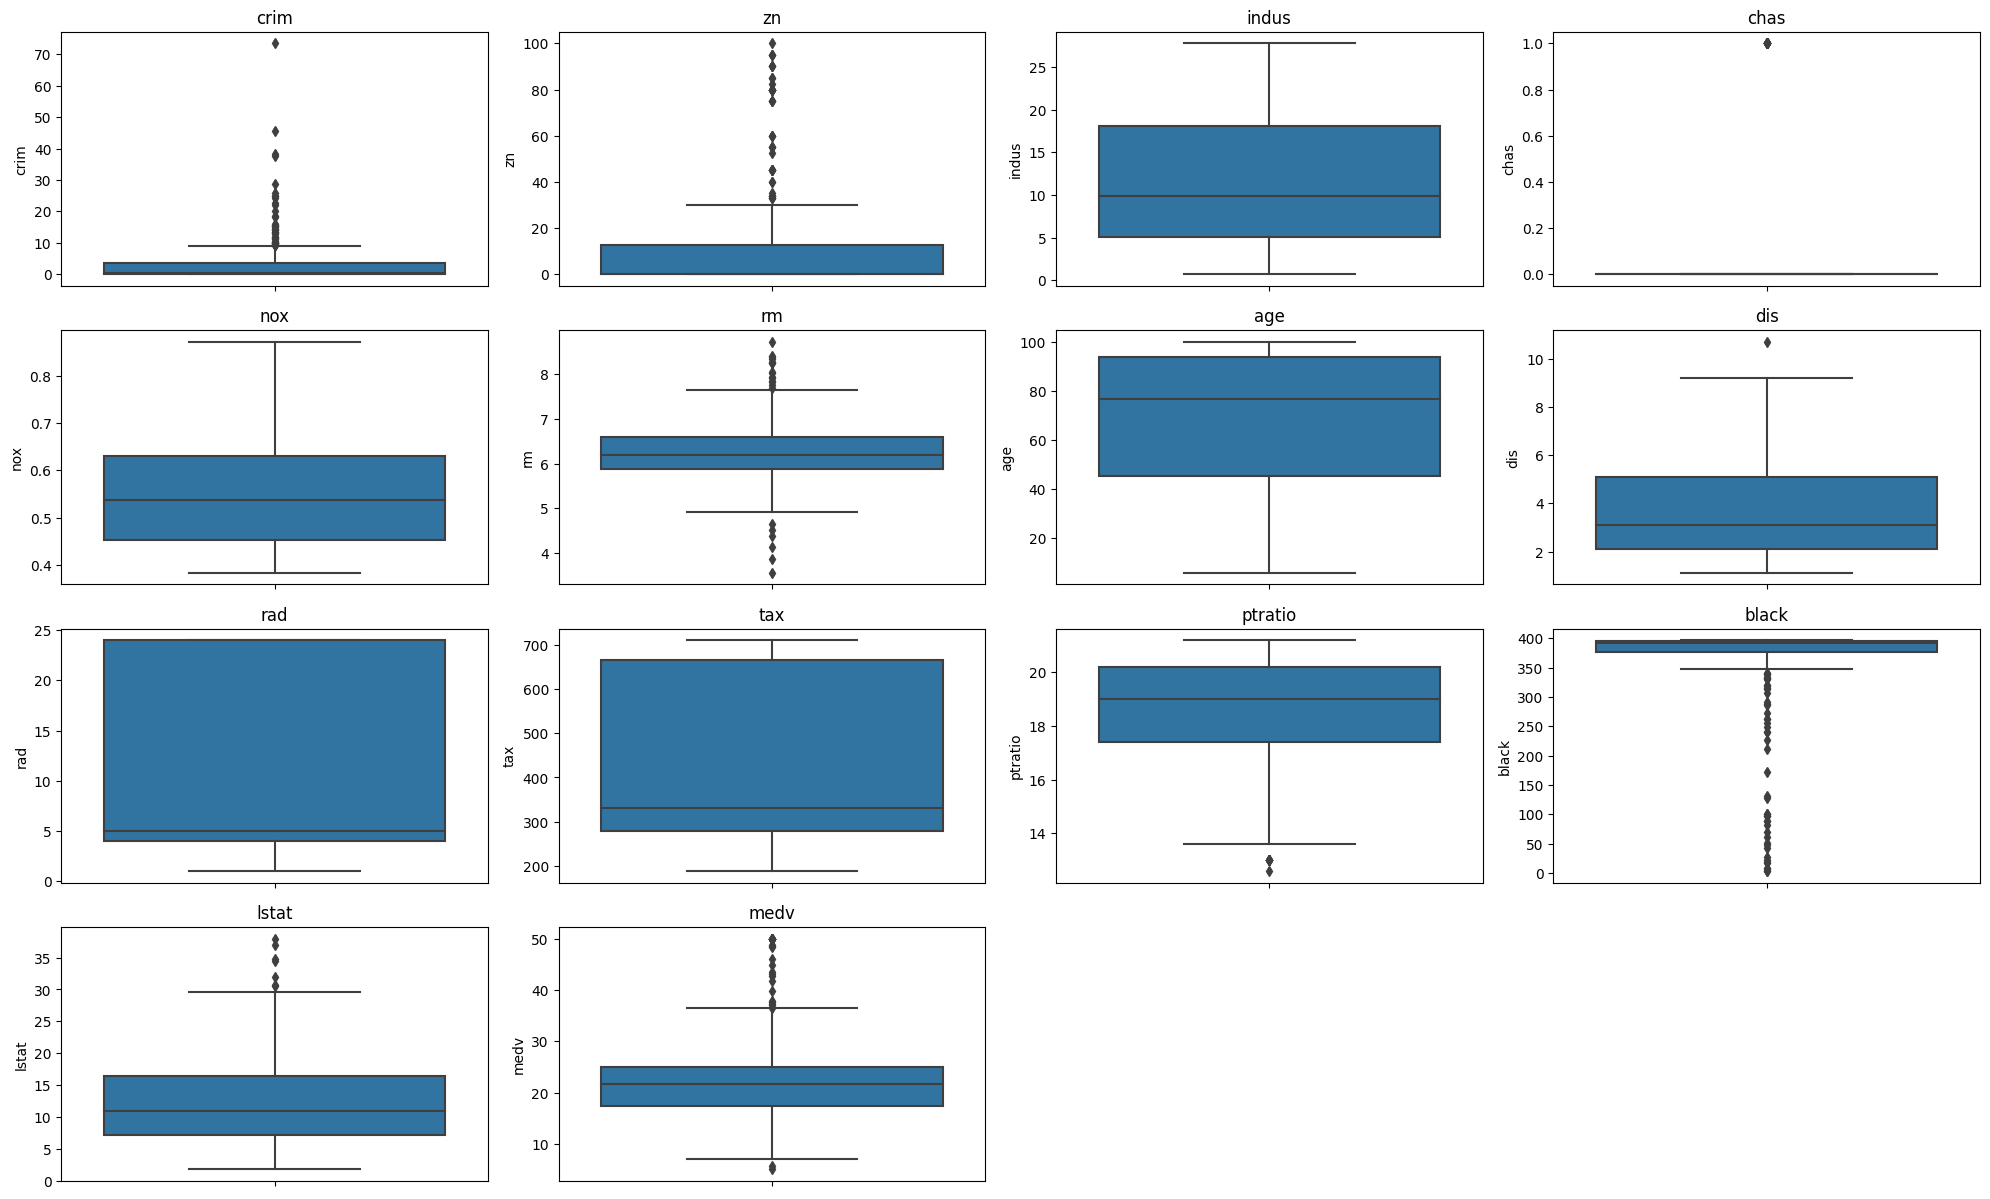

In [49]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns):
    # Adjust the number of rows and columns based on the number of features
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

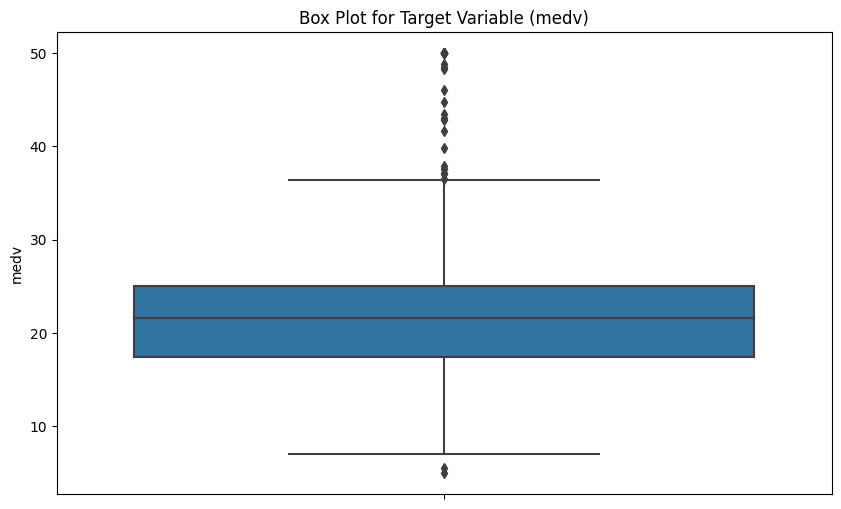

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['medv'])
plt.title('Box Plot for Target Variable (medv)')
plt.show()

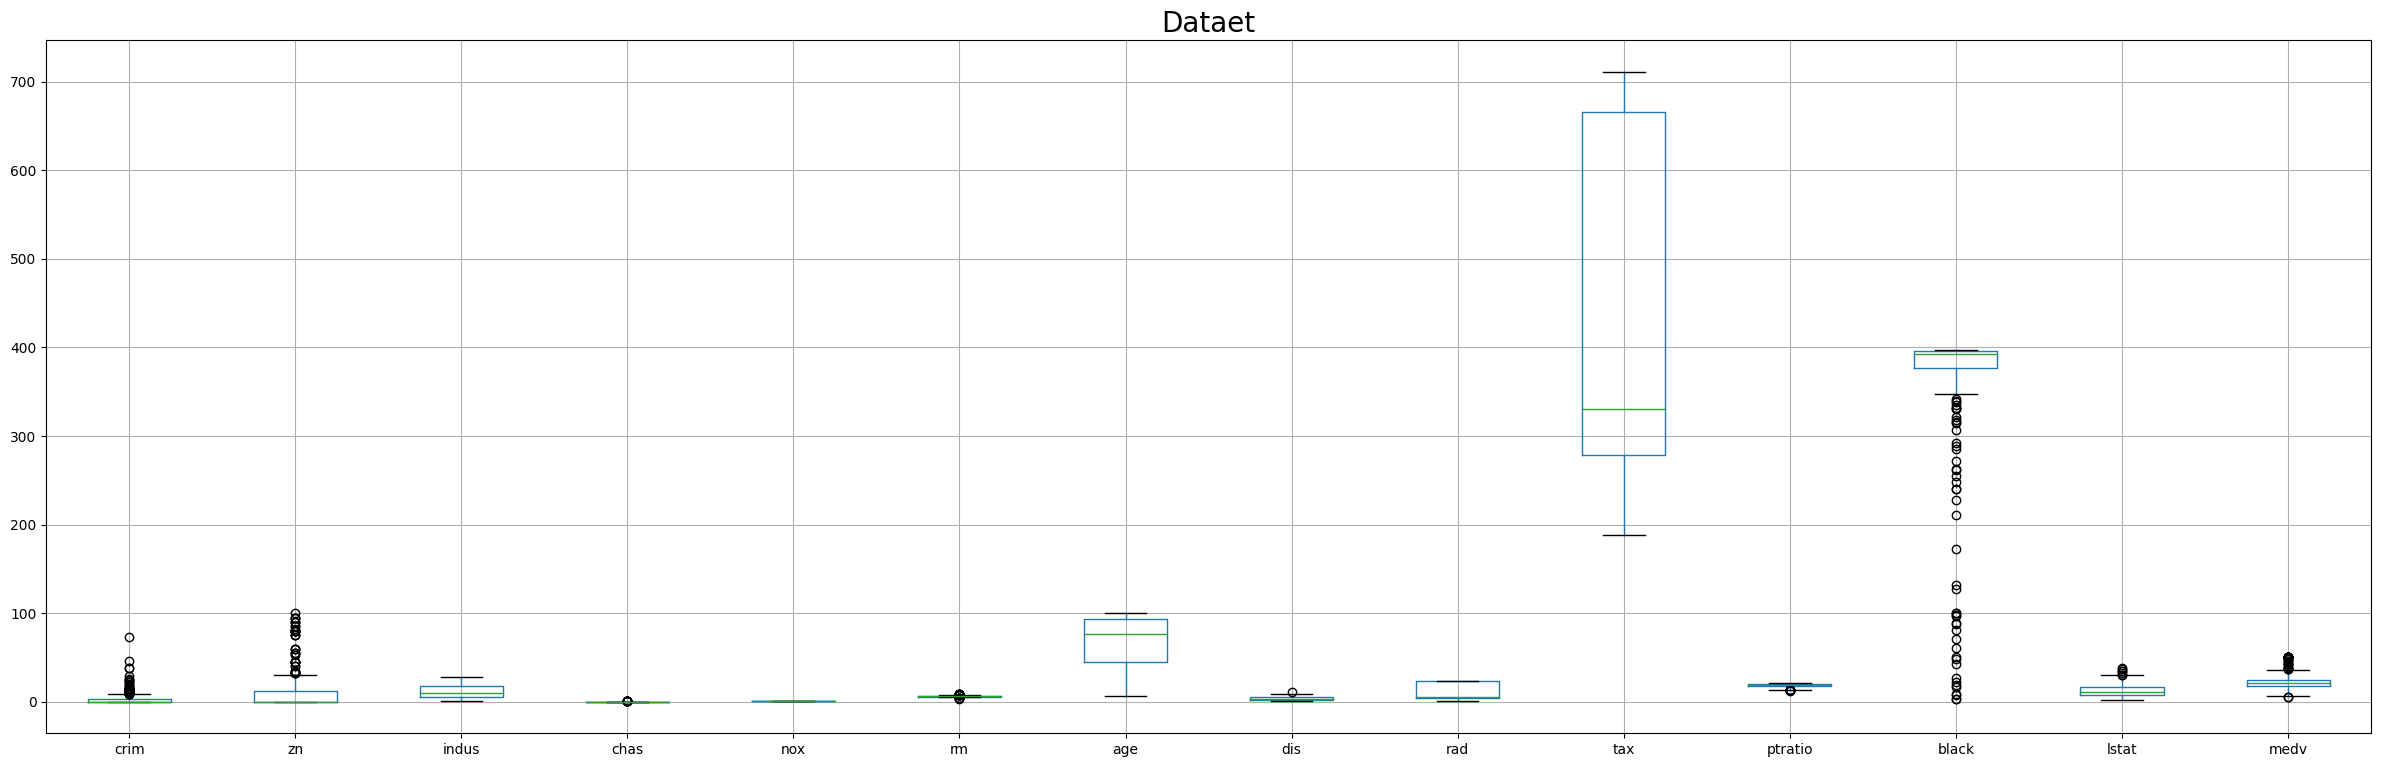

In [51]:
plt.figure(figsize=(30, 9))
df.boxplot()
plt.title("Dataet", fontsize=20)
plt.show()

In [52]:
# Function to identify outliers using IQR
def find_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

# Function to identify outliers using Z-score
def find_outliers_zscore(df, threshold=3):
    z_scores = zscore(df, nan_policy='omit')
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    return outliers

# Identify outliers using IQR
outliers_iqr = find_outliers_iqr(df)
outliers_iqr_count = outliers_iqr.any(axis=1).sum()
print("Number of outliers detected using IQR:", outliers_iqr_count)

# Identify outliers using Z-score
outliers_zscore = find_outliers_zscore(df)
outliers_zscore_count = outliers_zscore.any(axis=1).sum()
print("Number of outliers detected using Z-score:", outliers_zscore_count)

Number of outliers detected using IQR: 151
Number of outliers detected using Z-score: 65


**in case i notice these outliers are not valuable and want to remove them**

In [ ]:
# Function to remove outliers using IQR
# def remove_outliers_iqr(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
#     df_out = df[~((df < (Q1 - 1.5 * IQR)) |
#                   (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#     return df_out


# # Remove outliers
# df_clean = remove_outliers_iqr(df)

# # Check the shape of the dataframe after removing outliers
# print("Shape before removing outliers:", df.shape)
# print("Shape after removing outliers:", df_clean.shape)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Spliting the data</h1>

In [53]:
X = df.drop(columns='medv')
Y = df['medv']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Scaling</h1>

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # only for trainning data
X_test_scaled = scaler.transform(X_test)   # for any data

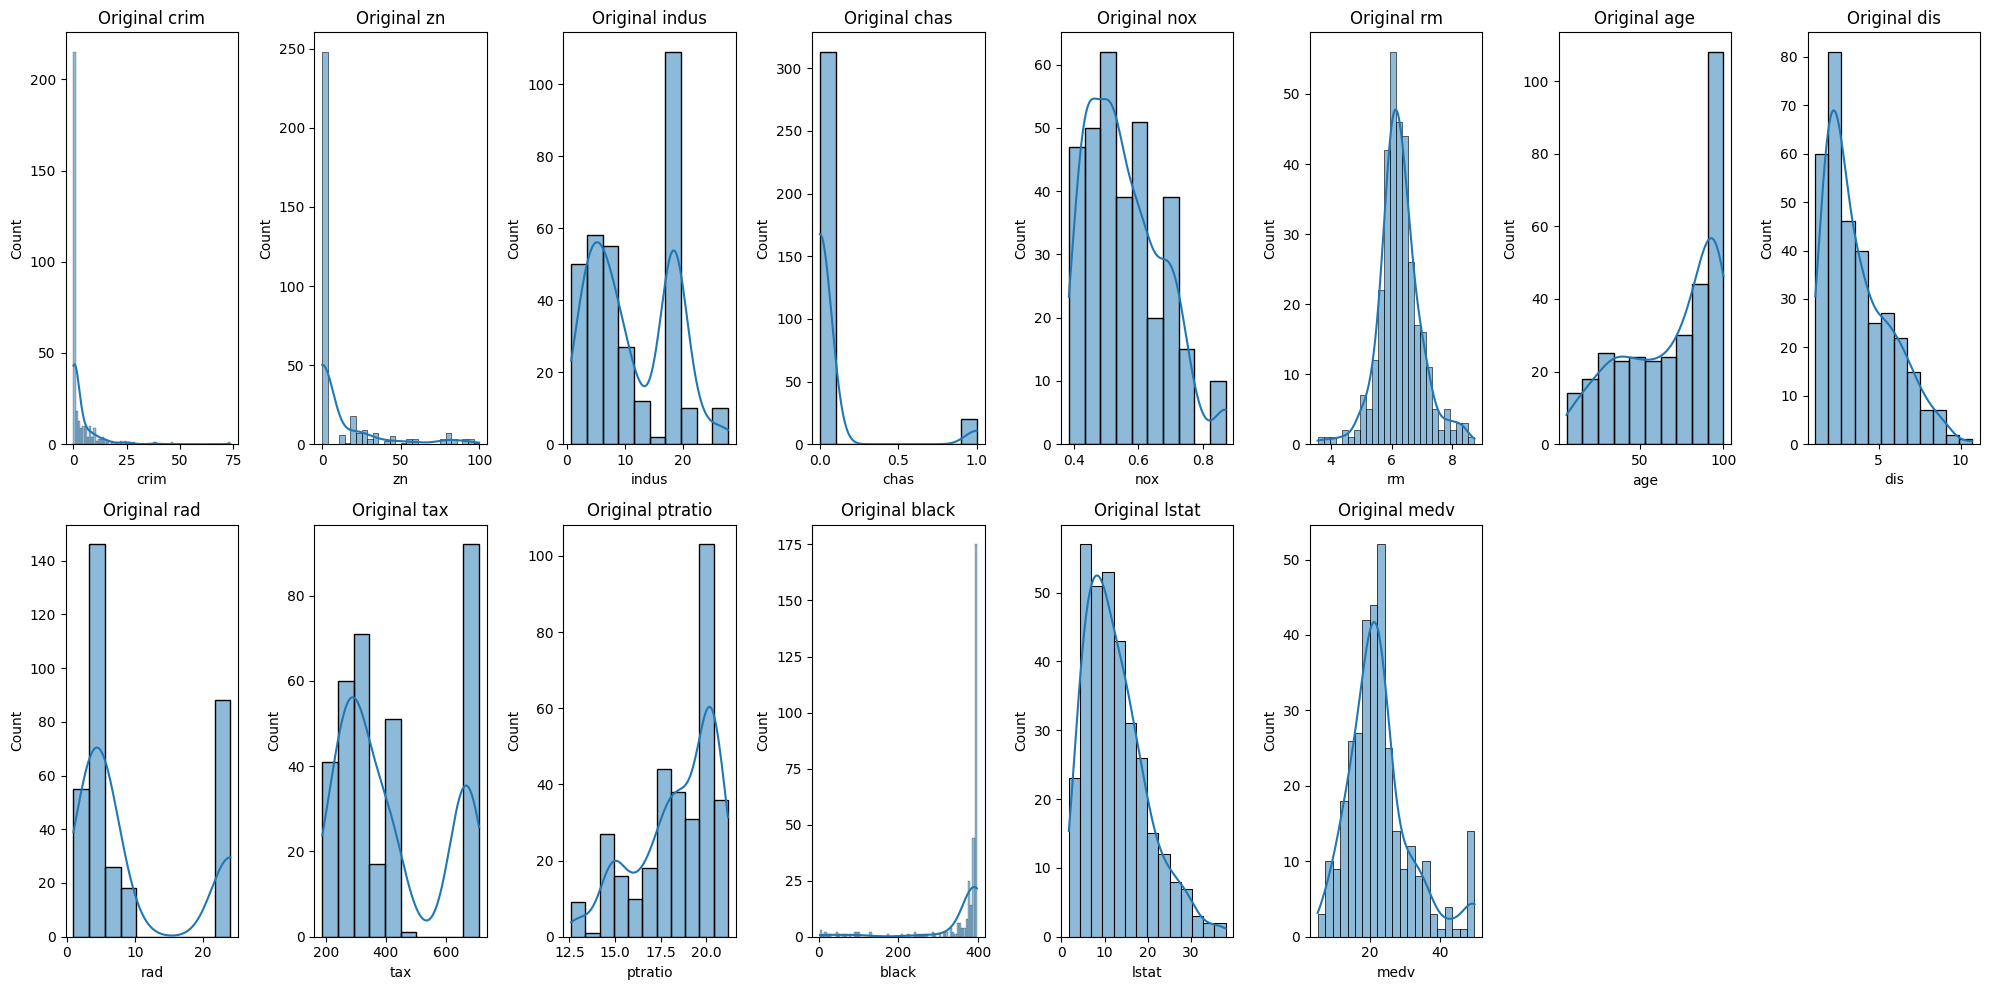

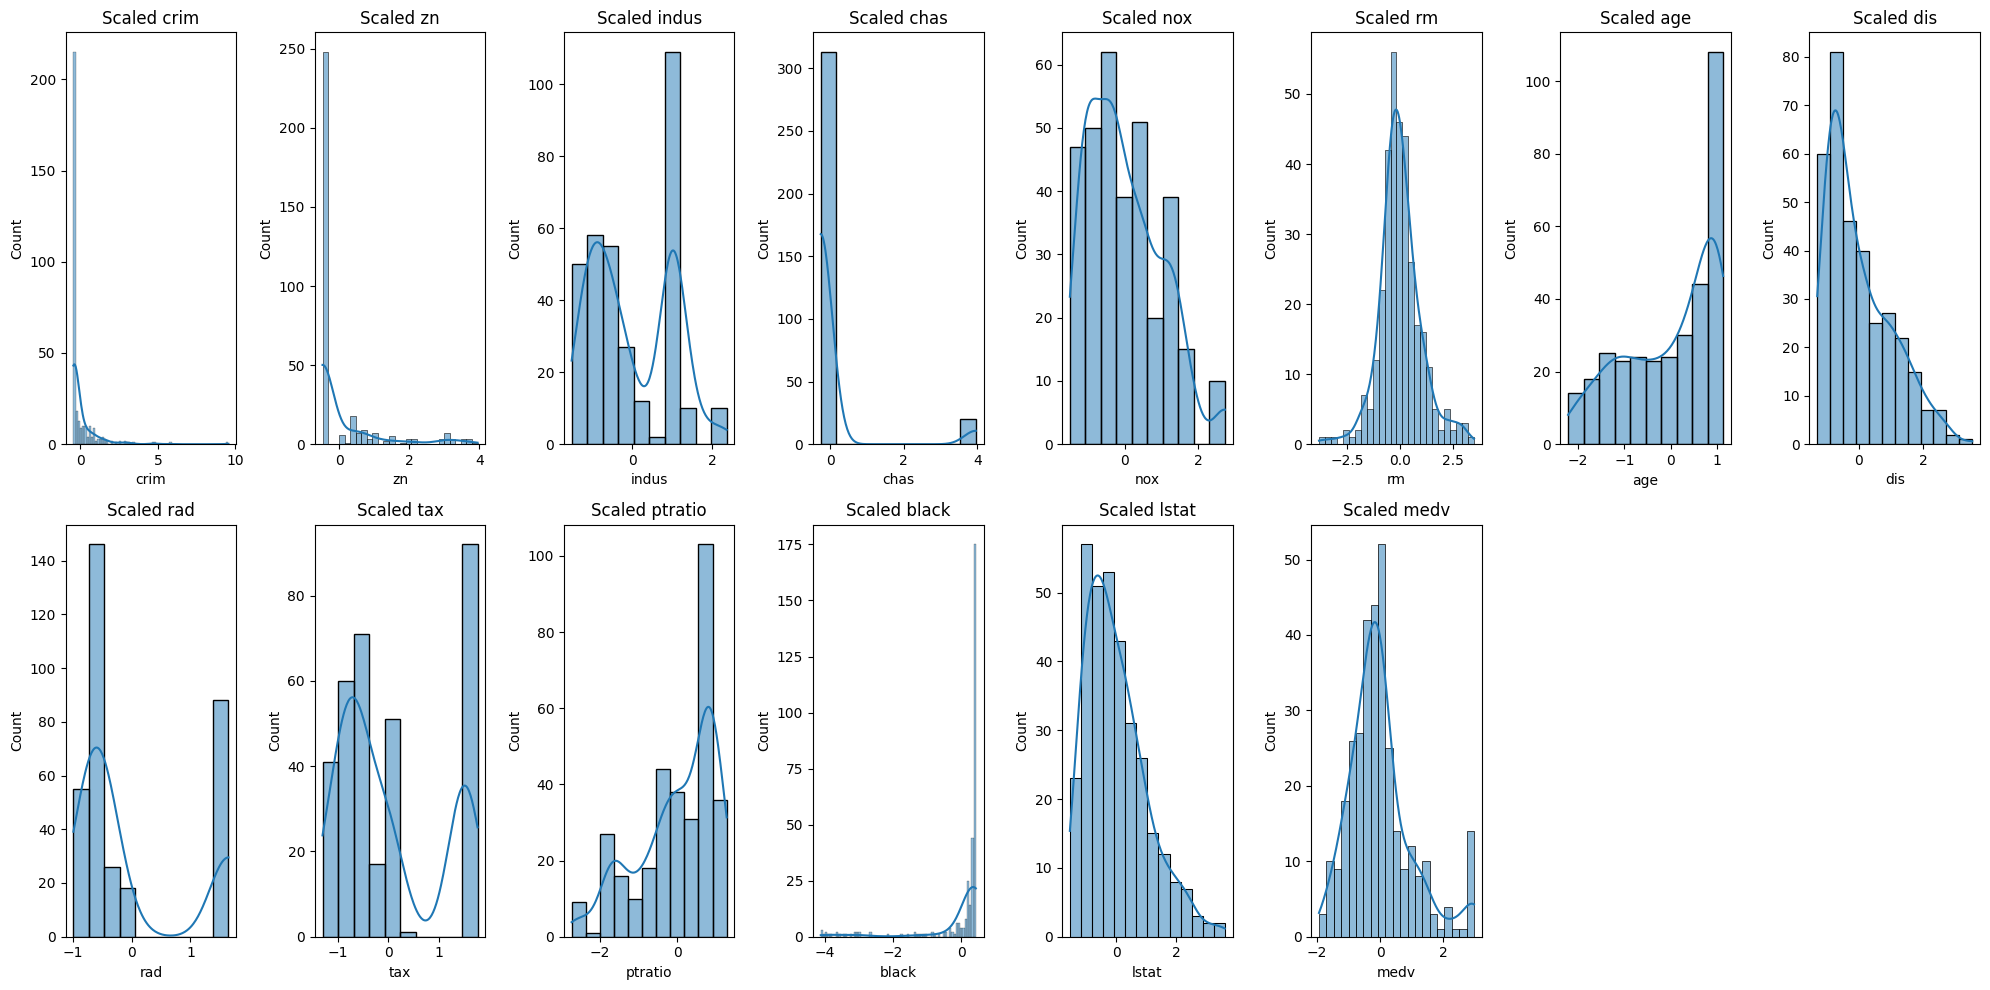

In [56]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, len(df.columns)//2 + 1, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Original {column}')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

plt.figure(figsize=(20, 10))
for i, column in enumerate(scaled_df.columns):
    plt.subplot(2, len(scaled_df.columns)//2 + 1, i + 1)
    sns.histplot(scaled_df[column], kde=True)
    plt.title(f'Scaled {column}')
plt.tight_layout()
plt.show()

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;"Train Models</h2>

In [57]:
# Initialize the list to store results
results = []

# List of models
models = [
    ('Lasso', Lasso(alpha=.01, tol=.03)),
    ('linear regression', LinearRegression()),
    ('SVR', SVR(kernel='poly', C=15, epsilon=.01)),
    ('KNN', KNeighborsRegressor(n_neighbors=25)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=80)),
    ('Random Forest', RandomForestRegressor(n_estimators=100,
     max_depth=15, criterion='absolute_error', min_samples_split=10)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=100, learning_rate=.1)),
    ('XGB', XGBRegressor()),
    ('MLP', MLPRegressor(hidden_layer_sizes=[
     128, 64, 32, 4], learning_rate='invscaling', learning_rate_init=.1)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=200,
     learning_rate=0.1, loss='huber', max_depth=3, subsample=0.9)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=200,
     max_depth=12, criterion='absolute_error', bootstrap=False))
]

def evaluate_model(model, model_name):
    model.fit(X_train_scaled, Y_train)
    y_test_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, y_test_pred)
    mae = mean_absolute_error(Y_test, y_test_pred)
    r2 = r2_score(Y_test, y_test_pred)
    rmse = np.sqrt(mse)
    results.append([model_name, mse, mae, r2, rmse])

for model_name, model in models:
    evaluate_model(model, model_name)

results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R2", "RMSE"])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Models Comparsion</h1>

In [58]:
results_df

,Model,MSE,MAE,R2,RMSE
0,Lasso,17.647693,3.294651,0.824886,4.200916
1,linear regression,17.604919,3.293821,0.825310,4.195822
2,SVR,33.614341,3.506308,0.666452,5.797788
3,KNN,32.646262,3.941313,0.676058,5.713691
4,Decision Tree,11.744478,2.582090,0.883462,3.427022
5,Random Forest,5.514260,1.853739,0.945283,2.348246
6,AdaBoost,12.300393,2.868978,0.877946,3.507192
7,XGB,6.147356,1.936243,0.939001,2.479386
8,MLP,11.583001,2.799478,0.885064,3.403381
9,Gradient Boosting,6.011835,1.864317,0.940346,2.451904


In [59]:
ETR = ExtraTreesRegressor(n_estimators=200,max_depth=12, criterion='absolute_error', bootstrap=False)
ETR.fit(X_train_scaled, Y_train)

y_train_pred_ETR = ETR.predict(X_train_scaled)
y_test_pred_ETR = ETR.predict(X_test_scaled)

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': y_test_pred_ETR
})

results_df.head(10)

,Actual Values,Predicted Values
0,36.5,34.85750
1,43.1,39.36175
2,22.4,23.38750
3,17.4,19.80475
4,10.8,11.55400
5,29.0,26.96775
6,50.0,45.65450
7,20.6,20.41125
8,31.2,30.80875
9,24.5,27.21500


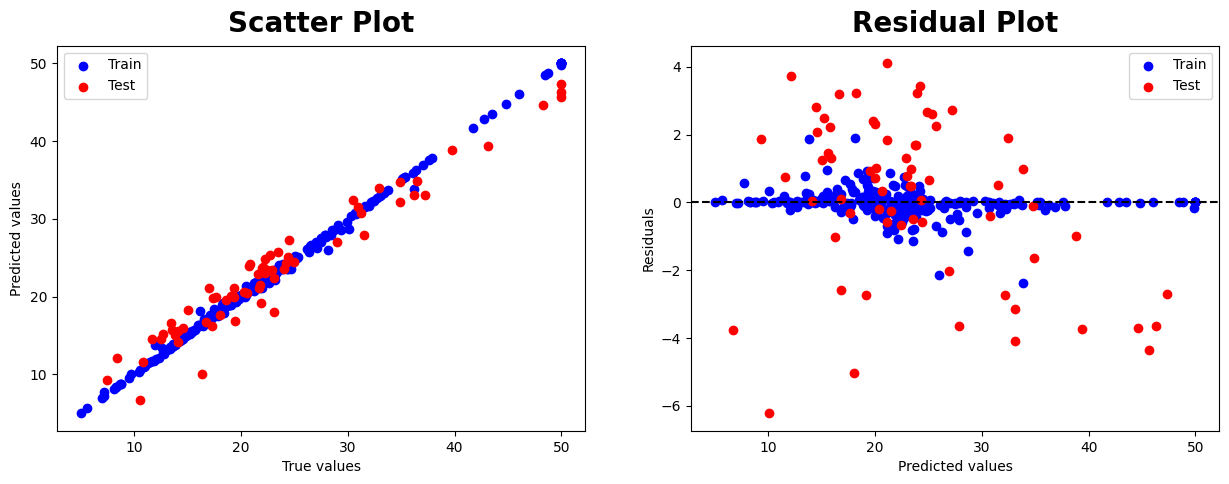

In [60]:
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_ETR, color='blue', label='Train')
plt.scatter(Y_test, y_test_pred_ETR, color='red', label='Test')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="black", size=20, pad=10)

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_ETR, y_train_pred_ETR - Y_train, color='blue', label='Train')
plt.scatter(y_test_pred_ETR, y_test_pred_ETR - Y_test, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot', fontweight="black", size=20, pad=10)

plt.show()

<div style=" background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Finally:</font></h3>

 The **best performing** model untill now is **Extra Tree Regressor** with **highest R2** &  **lowest MAE,MSE,RMSE** values

**As Gradient Bossting Regressor & Extra Tree Regressor are the most suitable models in our case so i decided to do hyperparameter tunning for both of them and also do ensmbling for bot of them too**

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">HyperParameter Tunning </h2>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">GridSearchCV</h2>
<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Extra Trees Regressor Tunning</h4>

In [61]:
# Define the parameter grid for hyperparameter tuning
param_grid_etr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [12, 13, 14],
    'criterion': ['absolute_error', 'poisson', 'squared_error'],
    'bootstrap': [False, True]
}

grid_search_etr = GridSearchCV(ExtraTreesRegressor(), param_grid_etr, cv=4, scoring='neg_mean_absolute_error')
grid_search_etr.fit(X_train_scaled, Y_train)

print(f"Best parameters for ExtraTrees: {grid_search_etr.best_params_}")
print(f"Best score for ExtraTrees: {-grid_search_etr.best_score_}")

best_etr = grid_search_etr.best_estimator_
Y_pred_best_etr = best_etr.predict(X_test_scaled)

mae_best_etr = mean_absolute_error(Y_test, Y_pred_best_etr)
r2_best_etr = r2_score(Y_test, Y_pred_best_etr)
mse_best_etr = mean_squared_error(Y_test, Y_pred_best_etr)
rmse_best_etr = np.sqrt(mse_best_etr)

print('\nBest ExtraTrees after Grid Search:')
print('R2 score:', r2_best_etr)
print('MAE:', mae_best_etr)
print('MSE:', mse_best_etr)
print('RMSE:', rmse_best_etr)

# Append the results to the results list
results.append(['Extra Trees Regressor (Tuned)', 'etr_tuned',mse_best_etr, mae_best_etr, r2_best_etr, rmse_best_etr])

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': Y_pred_best_etr
})

results_df.head(10)

Best parameters for ExtraTrees: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 13, 'n_estimators': 100}
Best score for ExtraTrees: 2.2750929443690637

Best ExtraTrees after Grid Search:
R2 score: 0.9410636594557616
MAE: 1.9743432835820853
MSE: 5.939500417910429
RMSE: 2.4371090287285937


,Actual Values,Predicted Values
0,36.5,34.9890
1,43.1,38.9135
2,22.4,23.4290
3,17.4,19.8860
4,10.8,11.3430
5,29.0,27.2480
6,50.0,45.3030
7,20.6,20.4495
8,31.2,30.2780
9,24.5,27.7875


<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Gradient Boosting Regressor Tunning</h4>

In [62]:
# Define the parameter grid for hyperparameter tuning
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['huber', 'lad', 'ls']
}

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(
), param_grid_gbr, cv=4, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(X_train_scaled, Y_train)

print(f"Best parameters for Gradient Boosting: {grid_search_gbr.best_params_}")
print(f"Best score for Gradient Boosting: {-grid_search_gbr.best_score_}")

best_gbr = grid_search_gbr.best_estimator_
Y_pred_best_gbr = best_gbr.predict(X_test_scaled)

mae_best_gbr = mean_absolute_error(Y_test, Y_pred_best_gbr)
r2_best_gbr = r2_score(Y_test, Y_pred_best_gbr)
mse_best_gbr = mean_squared_error(Y_test, Y_pred_best_gbr)
rmse_best_gbr = np.sqrt(mse_best_gbr)

print('\nBest Gradient Boosting Regressor after Grid Search:')
print('R2 score:', r2_best_gbr)
print('MAE:', mae_best_gbr)
print('MSE:', mse_best_gbr)
print('RMSE:', rmse_best_gbr)

results.append(['Gradient Boosting Regressor (Tuned)', 'gbr_tuned',
               mse_best_gbr, mae_best_gbr, r2_best_gbr, rmse_best_gbr])

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': Y_pred_best_gbr
})

# Display the first 10 rows of the DataFrame
results_df.head(10)

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best score for Gradient Boosting: 2.312996656836887

Best Gradient Boosting Regressor after Grid Search:
R2 score: 0.9460669764775856
MAE: 1.7055877117341365
MSE: 5.435274955867085
RMSE: 2.331367614913419


,Actual Values,Predicted Values
0,36.5,37.091666
1,43.1,42.311206
2,22.4,23.315778
3,17.4,18.996912
4,10.8,10.083690
5,29.0,26.293587
6,50.0,41.778845
7,20.6,19.938761
8,31.2,30.296312
9,24.5,26.712639


*  **Extra Trees Regressor** is **highest R2** &  **lowest MAE,MSE,RMSE** also after Tunning it 


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Ensemble Learning</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Voting Regressor</h3>

In [63]:
regressors = [
    ('gbr', GradientBoostingRegressor(n_estimators=200,
     learning_rate=0.1, loss='huber', max_depth=3, subsample=0.9)),
    ('etr', ExtraTreesRegressor(n_estimators=200, max_depth=12,
     criterion='absolute_error', bootstrap=False))
]

voting_regressor = VotingRegressor(estimators=regressors)

voting_regressor.fit(X_train_scaled, Y_train)

y_train_pred = voting_regressor.predict(X_train_scaled)
y_test_pred = voting_regressor.predict(X_test_scaled)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the VotingRegressor model = {r2}")
print(f"MAE of VotingRegressor model = {mae}")
print(f"MSE of VotingRegressor model = {mse}")
print(f"RMSE of VotingRegressor model = {rmse}")

results.append(['Voting Regressor', 'voting', mse, mae, r2, rmse])

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': y_test_pred
})

results_df.head(10)

R2 Score of the VotingRegressor model = 0.9510083246603908
MAE of VotingRegressor model = 1.7183133007567821
MSE of VotingRegressor model = 4.937294604087661
RMSE of VotingRegressor model = 2.2220023861570586


,Actual Values,Predicted Values
0,36.5,34.849022
1,43.1,40.778674
2,22.4,22.447754
3,17.4,19.778298
4,10.8,11.337423
5,29.0,27.479505
6,50.0,45.095413
7,20.6,20.574005
8,31.2,30.710361
9,24.5,26.586183


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Stacking Regressor</h3>

In [64]:
base_regressors = [
    ('lr', LinearRegression()),
    ('gbr', GradientBoostingRegressor(n_estimators=200,
     learning_rate=0.1, loss='huber', max_depth=3, subsample=0.9)),
    ('etr', ExtraTreesRegressor(n_estimators=200, max_depth=12,
     criterion='absolute_error', bootstrap=False))
]

# Define  meta-regressor
meta_regressor = LinearRegression()

stacking_regressor = StackingRegressor(
    estimators=base_regressors, final_estimator=meta_regressor)

stacking_regressor.fit(X_train_scaled, Y_train)

y_train_pred = stacking_regressor.predict(X_train_scaled)
y_test_pred = stacking_regressor.predict(X_test_scaled)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the StackingRegressor model = {r2}")
print(f"MAE of StackingRegressor model = {mae}")
print(f"MSE of StackingRegressor model = {mse}")
print(f"RMSE of StackingRegressor model = {rmse}")

# Append the results to the results list
results.append(['Stacking Regressor', 'stacking', mse, mae, r2, rmse])

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': y_test_pred
})

results_df.head(10)

R2 Score of the StackingRegressor model = 0.9593802802176126
MAE of StackingRegressor model = 1.5214057261337337
MSE of StackingRegressor model = 4.093583693778896
RMSE of StackingRegressor model = 2.02326065888182


,Actual Values,Predicted Values
0,36.5,36.239147
1,43.1,41.566487
2,22.4,22.719726
3,17.4,20.106271
4,10.8,10.062254
5,29.0,27.698412
6,50.0,47.076329
7,20.6,20.470198
8,31.2,31.736069
9,24.5,26.948641


<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">Stacking Regression Ensemble Method is The Bset so We Will Save its Model For further Work </h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Cross Validation</h1>

In [65]:
cv_scores = cross_val_score(stacking_regressor, X_train_scaled,Y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculate mean & standard deviation of cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print(f'Mean Cross-Validation MAE: {mean_cv_score}')
print(f'Standard Deviation of Cross-Validation MAE: {std_cv_score}')

Mean Cross-Validation MAE: 2.3335926701127425
Standard Deviation of Cross-Validation MAE: 0.298900294554294


**Plot Learning Curves: Plot training and validation error as a function of the training set size or training epochs.**

**Overfitting: Learning curves show a large gap between training and validation error.**
**Underfitting: Learning curves show high error for both training and validation data.**

In [1]:
# # Plot learning curves
# train_sizes, train_scores, validation_scores = learning_curve(
#     stacking_regressor, X_train_scaled, Y_train, cv=5, scoring='neg_mean_absolute_error')

# train_mean = -train_scores.mean(axis=1)
# validation_mean = -validation_scores.mean(axis=1)

# plt.figure()
# plt.plot(train_sizes, train_mean, label='Training Error')
# plt.plot(train_sizes, validation_mean, label='Validation Error')
# plt.xlabel('Training Size')
# plt.ylabel('Error')
# plt.title('Learning Curves')
# plt.legend()
# plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Saving Model</h1>

In [68]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('stacking_regressor_model.pkl', 'wb') as file:
    pickle.dump(stacking_regressor, file)